# Homework A
We want to study the impact of discount factor using the endowments (income) in the first and second periods, and interest rate given below on the first and second period consumption, and saving amount.

y_0 = 1, y_1 = 1, r = 0.05

Use values from 0.9 to 0.99 with 0.01 increments for beta and create table to show the values of c_0, c_1, a, and utility for each value of beta. Explain how consumption and savings change with the increase in beta. Why?

To solve, you need to insert equations for optimal level of c_0, c_1, a and use the logarithmich utility function to derive the values of c_0, c_1, a, and utility at the optimal level of c_0 and c_1.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
y0 = 1  # Endowment in period 0
y1 = 1  # Endowment in period 1
r = 0.05  # Interest rate
beta_values = np.arange(0.90, 1.00, 0.01)  # Discount factors
PV = y0 + y1 / (1 + r)  # Present value of lifetime income

# Create table for results
results = []

# Loop through beta values and calculate c0, c1, a, U
for beta in beta_values:
    # Calculate c0 and c1
    c0 = PV / (1 + beta)
    c1 = beta * (1 + r) * c0

    # Calculate savings
    a = y0 - c0

    # Calculate utility
    U = np.log(c0) + beta * np.log(c1)

    # Append results
    results.append({"Beta": beta, "c0": c0, "c1": c1, "a (savings)": a, "Utility": U})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


   Beta        c0        c1  a (savings)   Utility
0  0.90  1.027569  0.971053    -0.027569  0.000759
1  0.91  1.022189  0.976702    -0.022189  0.000494
2  0.92  1.016865  0.982292    -0.016865  0.000287
3  0.93  1.011596  0.987824    -0.011596  0.000136
4  0.94  1.006382  0.993299    -0.006382  0.000041
5  0.95  1.001221  0.998718    -0.001221  0.000002
6  0.96  0.996113  1.004082     0.003887  0.000016
7  0.97  0.991056  1.009391     0.008944  0.000083
8  0.98  0.986051  1.014646     0.013949  0.000202
9  0.99  0.981096  1.019849     0.018904  0.000373


   Beta        c0        c1         a   Utility
0  0.90  1.027569  0.971053 -0.027569  0.000759
1  0.91  1.022189  0.976702 -0.022189  0.000494
2  0.92  1.016865  0.982292 -0.016865  0.000287
3  0.93  1.011596  0.987824 -0.011596  0.000136
4  0.94  1.006382  0.993299 -0.006382  0.000041
5  0.95  1.001221  0.998718 -0.001221  0.000002
6  0.96  0.996113  1.004082  0.003887  0.000016
7  0.97  0.991056  1.009391  0.008944  0.000083
8  0.98  0.986051  1.014646  0.013949  0.000202
9  0.99  0.981096  1.019849  0.018904  0.000373


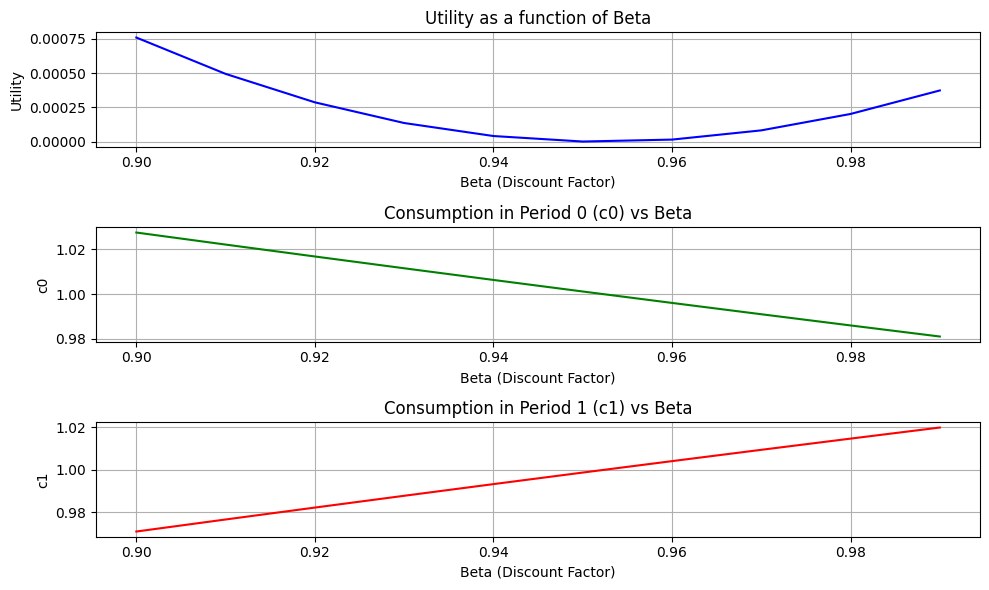

In [5]:
import numpy as np
import pandas as pd

# Parameters
y0 = 1  # Income in the first period
y1 = 1  # Income in the second period
r = 0.05  # Interest rate
PV = y0 + y1 / (1 + r)  # Present value of lifetime income
beta_values = np.arange(0.9, 0.991, 0.01)  # Beta values from 0.9 to 0.99

# Initialize an empty list to store results
results_list = []

# Loop through beta values and calculate c0, c1, a, and Utility
for beta in beta_values:
    # Optimal consumption and saving
    c0 = PV / (1 + beta)
    c1 = beta * (1 + r) * c0
    a = y0 - c0
    utility = np.log(c0) + beta * np.log(c1)

    # Append results as a dictionary to the list
    results_list.append({"Beta": beta, "c0": c0, "c1": c1, "a": a, "Utility": utility})

# Convert the list of dictionaries into a DataFrame
results = pd.DataFrame(results_list)

# Display the results
print(results)

import numpy as np
import matplotlib.pyplot as plt

# Define the utility maximization function
def SolveUtilityMaximizationProblem(y_0, y_1, beta, r):
    # Present Value of lifetime income
    PV = y_0 + y_1 / (1 + r)

    # Calculate c0 (consumption in the first period)
    c0 = PV / (1 + beta)

    # Calculate c1 (consumption in the second period)
    c1 = beta * (1 + r) * c0

    # Calculate utility (U)
    utility = np.log(c0) + beta * np.log(c1)

    return c0, c1, utility

# Parameters
y_0 = 1  # Income in the first period
y_1 = 1  # Income in the second period
r = 0.05  # Interest rate
beta_values = np.arange(0.9, 1.0, 0.01)  # Discount factor (beta values from 0.9 to 0.99)

# Initialize lists to store results
c0_values = []
c1_values = []
utility_values = []

# Loop through beta values and calculate corresponding c0, c1, and utility
for beta in beta_values:
    c0, c1, utility = SolveUtilityMaximizationProblem(y_0, y_1, beta, r)

    # Append the results
    c0_values.append(c0)
    c1_values.append(c1)
    utility_values.append(utility)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Utility vs Beta
plt.subplot(3, 1, 1)
plt.plot(beta_values, utility_values, label="Utility", color="b")
plt.xlabel("Beta (Discount Factor)")
plt.ylabel("Utility")
plt.title("Utility as a function of Beta")
plt.grid(True)

# Plot c0 vs Beta
plt.subplot(3, 1, 2)
plt.plot(beta_values, c0_values, label="c0 (Consumption in Period 0)", color="g")
plt.xlabel("Beta (Discount Factor)")
plt.ylabel("c0")
plt.title("Consumption in Period 0 (c0) vs Beta")
plt.grid(True)

# Plot c1 vs Beta
plt.subplot(3, 1, 3)
plt.plot(beta_values, c1_values, label="c1 (Consumption in Period 1)", color="r")
plt.xlabel("Beta (Discount Factor)")
plt.ylabel("c1")
plt.title("Consumption in Period 1 (c1) vs Beta")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


As β increases:

The consumer saves more and consumes less in the present.
The consumption in the future increases.
Utility increases as the consumer becomes more future-oriented.

Based on the table we can see the trade-off between c0 & c1. The discount factor changes. When β is low, the consumer is more willing to consume today, but as β increases, they choose to save more and consume in the future.



# Homework B
Assume that there are two countries that share the following same values in the following parameters:
\begin{align}
\delta=0.1, \alpha=0.33, \sigma=2, \beta=0.96
\end{align}


Conduct the following fiscal policy experiments, derive steady-state level of capital and consumption per effective labor and display them in phase diagram:

## Question 1

The following tax rates and government spending are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{f}, \tau^{w}, g
\end{align}

The capital tax rate and government transfers are zero in the first but positive in the second country:
\begin{align}
\tau^{a}_{1}=v_{1}=0\\
\tau^{a}_{2}=0.2,v_{2}>0
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

In [6]:
# Define functions
def SteadyState_Fiscal(params, fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    ρ = 1 / β - 1

    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    v = fiscal.get('v')  # Transfers tax

    # Steady-state capital
    k_star = (α / ((ρ / ((1 - tau_a) * (1 - tau_f))) + δ))**(1 / (1 - α))
    # Steady-state consumption
    c_star = k_star**α - δ * k_star + v

    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    v = fiscal.get('v')

    # Resource constraint: output = consumption + depreciation + transfers
    return k**α + (1 - δ) * k - c + v

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)

    if k_next > 0:
        r_next = (1 - tau_f) * (α * k_next**(α - 1) - δ)
        c_next = (β * (1 + (1 - tau_a) * r_next))**(1 / σ) * c
        return c_next
    else:
        return 0

def Constant_k_Fiscal(k, params, fiscal):
    α = params['α']
    δ = params['δ']
    v = fiscal.get('v')

    # Capital dynamics: change in k = 0
    return k**α - δ * k + v

def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    T += 1
    k_t = np.zeros(T)
    c_t = np.zeros(T)

    k_t[0] = k_0
    c_t[0] = c_0

    for t in range(T - 1):
        k_t[t + 1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t + 1] > 0:
            c_t[t + 1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t + 1] = 0
            c_t[t + 1] = 0

    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)

    ss_diff = np.sqrt((k_t - k_star)**2 + (c_t - c_star)**2)
    return np.min(ss_diff) + ss_diff[-1]


In [7]:
# Adding Parameters values
params = {'α': 0.33, 'δ': 0.1, 'σ': 2, 'β': 0.96}

# Fiscal Parameters for Country 1: no taxes, no transfers, no government spending
fiscal_1 = {'g': 0, 'tau_a': 0, 'tau_f': 0, 'v': 0}

# Fiscal Parameters for Country 2: capital tax and transfers
fiscal_2 = {'g': 0, 'tau_a': 0.2, 'tau_f': 0, 'v': 0.2}

# Steady States
k_star_1, c_star_1 = SteadyState_Fiscal(params, fiscal_1)
k_star_2, c_star_2 = SteadyState_Fiscal(params, fiscal_2)

print(f"Country 1 Steady-State:\n  Capital: {k_star_1:.4f}, Consumption: {c_star_1:.4f}")
print(f"Country 2 Steady-State:\n  Capital: {k_star_2:.4f}, Consumption: {c_star_2:.4f}")

Country 1 Steady-State:
  Capital: 3.5329, Consumption: 1.1634
Country 2 Steady-State:
  Capital: 3.1779, Consumption: 1.3468


In [8]:
# Initial capital guess
k_0_1 = k_star_1 / 20

# Solve for initial consumption
result_1 = minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, fiscal_1, 100), method='Nelder-Mead')
c_0_1 = result_1.x[0]

#2nd country
k_0_2 = k_star_1 / 20
result_2 = minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, fiscal_2, 100), method='Nelder-Mead')
c_0_2 = result_2.x[0]

print(f"Country 1 Initial Consumption: {c_0_1:.4f}")
print(f"Country 2 Initial Consumption: {c_0_2:.4f}")

Country 1 Initial Consumption: 0.3874
Country 2 Initial Consumption: 0.5753


<ipython-input-6-9dfc8dcece90>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_t[0] = c_0


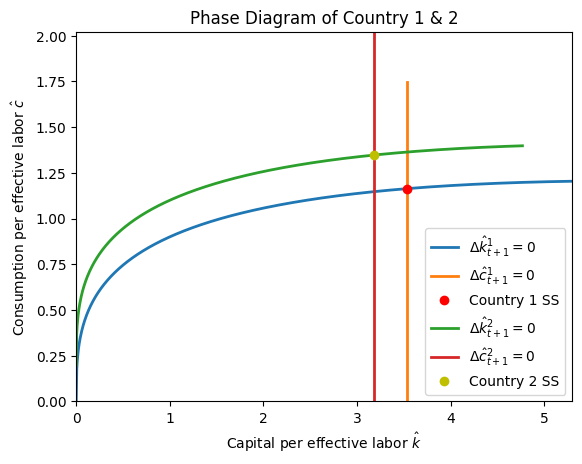

In [9]:
# Phase Diagram
k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, fiscal_1, 50)
k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, fiscal_2, 50)

kk_1 = np.linspace(0, 1.5 * k_star_1, 1000)
cc_1 = np.linspace(0, 1.5 * c_star_1, 1000)

kk_2 = np.linspace(0, 1.5 * k_star_2, 1000)
cc_2 = np.linspace(0, 1.5 * c_star_2, 1000)


# Plotting for Country 1
plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, fiscal_1), lw=2, label='$\\Delta \\hat{k}^{1}_{t+1}=0$')
plt.plot(np.full_like(kk_1, k_star_1), cc_1, lw=2, label='$\\Delta \\hat{c}^{1}_{t+1}=0$')
plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')

# Plotting for Country 2
plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, fiscal_2), lw=2, label='$\\Delta \\hat{k}^{2}_{t+1}=0$')
plt.plot(np.full_like(kk_2, k_star_2), cc_2, lw=2, label='$\\Delta \\hat{c}^{2}_{t+1}=0$')
plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')

plt.xlim(0, 1.5 * max(k_star_1, k_star_2))
plt.ylim(0, 1.5 * max(c_star_1, c_star_2))

plt.title('Phase Diagram of Country 1 & 2')
plt.xlabel('Capital per effective labor $\\hat{k}$')
plt.ylabel('Consumption per effective labor $\\hat{c}$')
plt.legend(loc='lower right')
plt.show()

As we can see from the plot, in steady state, the consumption in country 2 is actually higher than in the 1st country.
This can be observed from the vertical red line, which results from the transfer tax differences that provide income directly to households, reduce their reliance on savings, and therefore, increase consumption.

On the other hand, country 1 has a higher capital accumulation (movement from green to blue concave line) since it has no capital taxation, ensuring that the after-tax return on savings equals the marginal product of capital.

In Solow-Model, we have the capital equation as:
\begin{align}
\Delta K_t = s \cdot f(K_t) - \delta K_t
\end{align}

When households prioritize consumption, the savings rate declines, and it is reducing the level of Capital.


In conclusion, when transfer taxes are introduced, they:

- Increase disposable income for certain households, raising consumption.
- Decrease overall savings and investment, leading to lower capital in the long run.

## Question 3

The following tax rates and government transfers are zero in the two countries:


The consumption tax rate and government spending (fraction of output) are zero in the first but positive in the second country:



What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

In [ ]:
# Parameters
alpha = 0.33  # Capital share
delta = 0.05  # Depreciation rate
n = 0.02  # Population growth rate
theta = 0.02  # Technology growth rate
s = 0.2  # Savings rate

# Fiscal policies
g1, tau_c1 = 0, 0  # Country 1
g2, tau_c2 = 0.2, 0.2  # Country 2

# Function to calculate k* and c*
def calculate_steady_state(g, tau_c, alpha, delta, n, theta, s):
    # Steady-state capital per effective labor
    k_star = (s / (delta + g + n + theta)) ** (1 / (1 - alpha))
    # Steady-state consumption per effective labor
    c_star = (1 - tau_c) * (1 - s) * (k_star ** alpha)
    return k_star, c_star

# Calculate for both countries
k1, c1 = calculate_steady_state(g1, tau_c1, alpha, delta, n, theta, s)
k2, c2 = calculate_steady_state(g2, tau_c2, alpha, delta, n, theta, s)

# Results
print("Country 1 (No Fiscal Policy):")
print(f"  Steady-state capital per effective labor (k*): {k1:.4f}")
print(f"  Steady-state consumption per effective labor (c*): {c1:.4f}")
print("\nCountry 2 (With Fiscal Policy):")
print(f"  Steady-state capital per effective labor (k*): {k2:.4f}")
print(f"  Steady-state consumption per effective labor (c*): {c2:.4f}")


Country 1 (No Fiscal Policy):
  Steady-state capital per effective labor (k*): 3.2930
  Steady-state consumption per effective labor (c*): 1.1855

Country 2 (With Fiscal Policy):
  Steady-state capital per effective labor (k*): 0.5743
  Steady-state consumption per effective labor (c*): 0.5330
